# Getting Text data from RSS-Feeds

## Libraries and settings

In [1]:
# Libraries
import os
import feedparser
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Settings
import warnings
warnings.filterwarnings("ignore")

# Current working directory
print(f'Current working directory: {os.getcwd()}')

Current working directory: /workspaces/Clone_data_ingestion/07_RSS_Feeds


## Parse the RSS feed

In [ ]:
# RSS feeds from NZZ website
feed = feedparser.parse("https://www.nzz.ch/startseite.rss")

# print(feed['feed']['title'])                    # Titel des Feeds
# print(feed['entries'][0]['title'])              # Titel des ersten Beitrags
# print(feed['entries'][0]['link'])               # URL des Beitrags
# print(feed['entries'][0]['published'])          # Veröffentlichungsdatum des Beitrags
# print(feed['entries'][0]['summary'])            # Zusammenfassung des Beitrags
# print(feed['entries'][0]['tags'])               # Tags des Beitrags
# print(feed['entries'][0]['tags'][0]['term'])    # Erster Tag des Beitrags
# print(len(feed['entries']))                     # Anzahl der Beiträge im Feed
# print(feed['feed']['subtitle'])                 # Untertitel oder Beschreibung
# print(feed['feed']['updated'])                  # Letztes Änderungsdatum

# print(f"Anzahl der Beiträge im Feed: {len(feed['entries'])}")

####
for entry in feed.entries:
    print(entry.title)
    print(entry.link)
    print(entry.published if 'published' in entry else '(kein Datum)')
    print(entry.summary if 'summary' in entry else '(keine Zusammenfassung)')
    print(entry.get('author', '(kein Autor angegeben)'))
    print('-----------------------------------')
####


Thomas und Reto Knutti teilen den Namen, die Heimat und die Liebe zur Natur. Doch reden sie über den Klimaschutz, trennen sie Welten
https://www.nzz.ch/schweiz/thomas-knutti-und-reto-knutti-teilen-den-namen-die-heimat-und-die-liebe-zur-natur-doch-reden-sie-ueber-den-klimaschutz-trennen-sie-welten-ld.1910407
Sun, 09 Nov 2025 04:30:00 GMT
Der eine ist der berühmteste Klimaforscher des Landes, der andere SVP-Nationalrat und Gegner des Pariser Abkommens. Was sagt ihre Geschichte über die Kämpfe in der Schweizer Klimapolitik aus?
(kein Autor angegeben)
-----------------------------------
«Die Menschen flogen wie Schnee, der von einem Pflug zur Seite geschoben wird» – Besuch auf dem Weihnachtsmarkt in Magdeburg, ein Jahr nach dem Horror
https://www.nzz.ch/international/leben-nach-dem-anschlag-magdeburgs-weihnachtsmarkt-ein-jahr-spaeter-ld.1908636
Sun, 09 Nov 2025 04:30:00 GMT
Ab Montag steht ein Mann aus Saudiarabien vor Gericht, weil er mit einem Auto sechs Menschen getötet und mehr als 300

datetime.datetime(2025, 11, 7, 4, 30)

#### **feed** ist ein Objekt mit den Schlüsseln:
- feed      →   Metadaten (Titel, Link, Beschreibung, Sprache)
- entries   →   Liste der Beiträge (jedes Element = ein Artikel)
- bozo      →   True, wenn Parsing-Fehler auftraten (z. B. defektes XML)
- encoding  →   ermitteltes Encoding
- version   →   Feed-Version („rss20“, „atom10“ etc.)

## Extract the data

In [23]:
# Get data from RSS feeds
feed_entries = feed.entries                                          # Liest alle Einträge (Artikel) aus dem RSS-Feed und speichert sie in 'feed_entries'

# Initialize an empty string to store the text
wordcloud_text = ""                                                  # Erstellt einen leeren String für die spätere Erstellung einer Wordcloud

# Show first RSS-feeds
print("Article Titles:")                                             # Gibt die Überschrift "Article Titles:" in der Konsole aus
for entry in feed.entries:                                           # Schleife über alle Artikel im RSS-Feed

    article_title = entry.title                                      # Speichert den Titel des Artikels
    article_link = entry.link                                        # Speichert den Link des Artikels
    article_published_at = entry.published                           # Speichert das Veröffentlichungsdatum als String
    article_published_at_parsed = entry.published_parsed             # Speichert das Veröffentlichungsdatum als strukturierte Zeitangabe (struct_time)

    # Append the title to the wordcloud_text
    wordcloud_text += f"{article_title} "                            # Hängt den Artikeltitel an den Wordcloud-Text an, getrennt durch ein Leerzeichen

    # Change and format output
    print(f"{article_title}")                                        # Gibt den Titel des Artikels in der Konsole aus
    # print(f"{article_title}[{article_link}]")                      # (Optional) Gibt den Titel und den Link aus, wenn aktiviert
    # print(f"Published at {article_published_at}")                  # (Optional) Gibt das Veröffentlichungsdatum aus, wenn aktiviert


Article Titles:
Thomas und Reto Knutti teilen den Namen, die Heimat und die Liebe zur Natur. Doch reden sie über den Klimaschutz, trennen sie Welten
«Die Menschen flogen wie Schnee, der von einem Pflug zur Seite geschoben wird» – Besuch auf dem Weihnachtsmarkt in Magdeburg, ein Jahr nach dem Horror
«Der Skimarkt wird nicht mehr wachsen. Wir befinden uns in einem Verdrängungsmarkt»: Der Zermatt-Chef Franz Julen hält die Amerikaner für überschätzt
Hassobjekt Handy: Wie uns das Gerät süchtig macht – und zunehmend dümmer
Nach der Wahlniederlage vom Dienstag getrauen sich Republikaner, dem US-Präsidenten offen zu widersprechen. Hat jetzt Trumps Lahme-Ente-Phase begonnen?
Der KI-Hype hebt ab: Wettlauf der Tech-Giganten um KI-Fabriken im Weltall
Mit der Krankheit leben und lieben, solange es geht
INTERVIEW - «Ich dachte ein paarmal, ich wäre lieber ein Jahr im Koma gewesen als in der Psychose» – Der frühere Fussballer Kay Voser kämpft um ein neues Leben
SERIE - Gesund altern: wie sich normale

## Generate a WordCloud

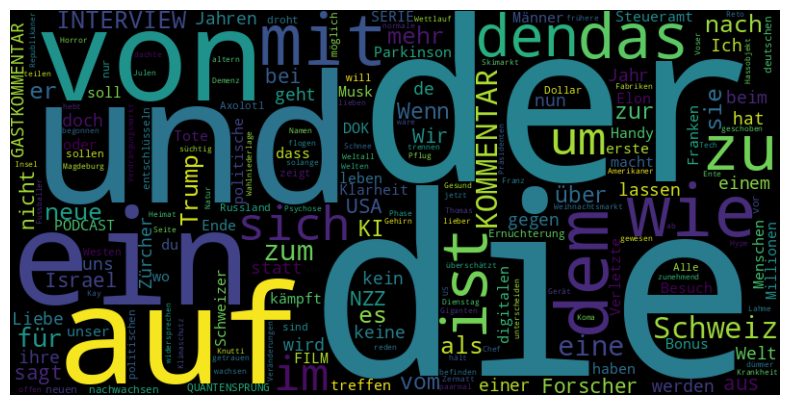

In [ ]:
# Generate the word cloud
wordcloud = WordCloud(width=800,                                     # Erstellt ein WordCloud-Objekt mit einer Breite von 800 Pixel
                      height=400,                                    # Setzt die Höhe der Wordcloud auf 400 Pixel
                      background_color='black').generate(wordcloud_text)  # Definiert schwarzen Hintergrund und generiert die Wordcloud aus dem Text

# Display the word cloud
plt.figure(figsize=(10, 5))                                          # Erstellt eine neue Figure mit einer Grösse von 10x5 Zoll
plt.imshow(wordcloud, interpolation='bilinear')                      # Zeigt die Wordcloud als Bild mit weicher Kanteninterpolation an
plt.axis('off')                                                      # Blendet die Achsen aus, damit nur die Wordcloud sichtbar ist
plt.show()                                                           # Zeigt die Wordcloud-Grafik im Notebook an


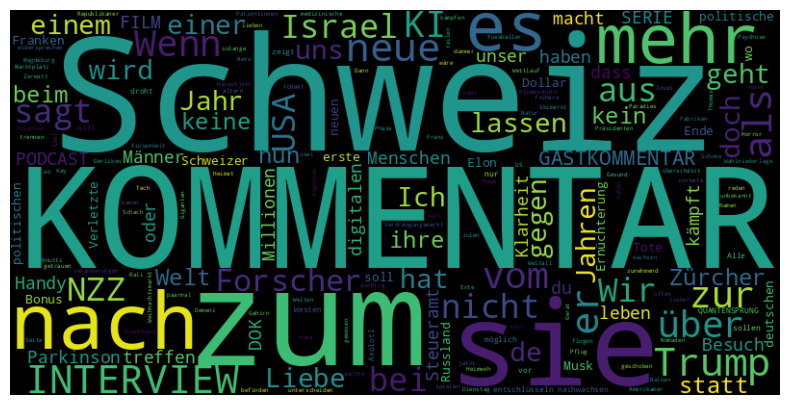

In [30]:
# Wordcloud mit Stopwörtern (Wörter, die ignoriert werden sollen)
from wordcloud import WordCloud, STOPWORDS

# Optional eigene Stopwort-Erweiterung (Deutsch + Englisch)
custom_stopwords = STOPWORDS.union({
    "und", "der", "die", "das", "ein", "eine", "von", "wie", "zu", 
    "mit", "im", "in", "auf", "für", "ist", "sind", "war", "werden",
    "dem", "um", "den", "sich"
})

# Wordcloud erzeugen mit Stopwörtern
wordcloud = WordCloud(width=800,
                      height=400,
                      background_color='black',
                      stopwords=custom_stopwords,
                      max_words=200).generate(wordcloud_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


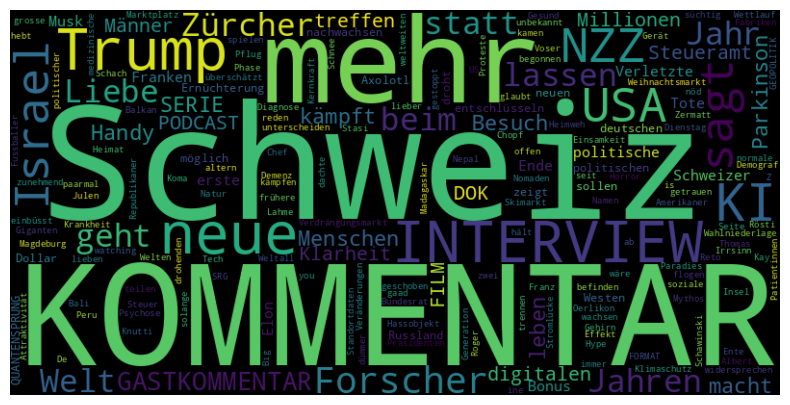

In [ ]:
# Wordcloud mit NLTK-Stopwörtern (Deutsch) (Natural Language Toolkit)
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import nltk

# NLTK-Stopwörter herunterladen (nur beim ersten Lauf nötig)
nltk.download('stopwords')

# Deutsche Stopwörter aus NLTK
german_stops = set(stopwords.words('german'))

# Wordcloud erzeugen mit deutschen Stopwörtern
wordcloud = WordCloud(width=800,
                      height=400,
                      background_color='black',
                      stopwords=german_stops,
                      max_words=200).generate(wordcloud_text)

# Wordcloud anzeigen
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [32]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.10.14-linuxkit
Datetime: 2025-11-09 12:22:37
Python Version: 3.11.14
-----------------------------------
